<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install mediapipe

In [63]:
import cv2
import mediapipe as mp
import numpy as np

In [64]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [65]:
pose = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

In [66]:
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

In [81]:
def classify_exercise(landmarks):
    if landmarks:
        left_shoulder = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        left_elbow = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        left_wrist = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                      landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        left_hip = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                    landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        left_knee = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                     landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        left_ankle = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                      landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        hip_angle = calculate_angle(left_shoulder, left_hip, left_knee)
        print(elbow_angle, knee_angle, hip_angle)

        if knee_angle < 100 and hip_angle < 100:
            return "Squat"
        elif elbow_angle < 180 and 90<knee_angle<180:
            return "Push-Up"
        elif knee_angle < 90 and abs(left_ankle[0] - left_hip[0]) > 0.1:
            return "Lunge"
        else:
            return "Unknown"
    else:
        return "No landmarks detected"

170.08761005306854 158.58823475381294 156.55884254110399
Push-Up


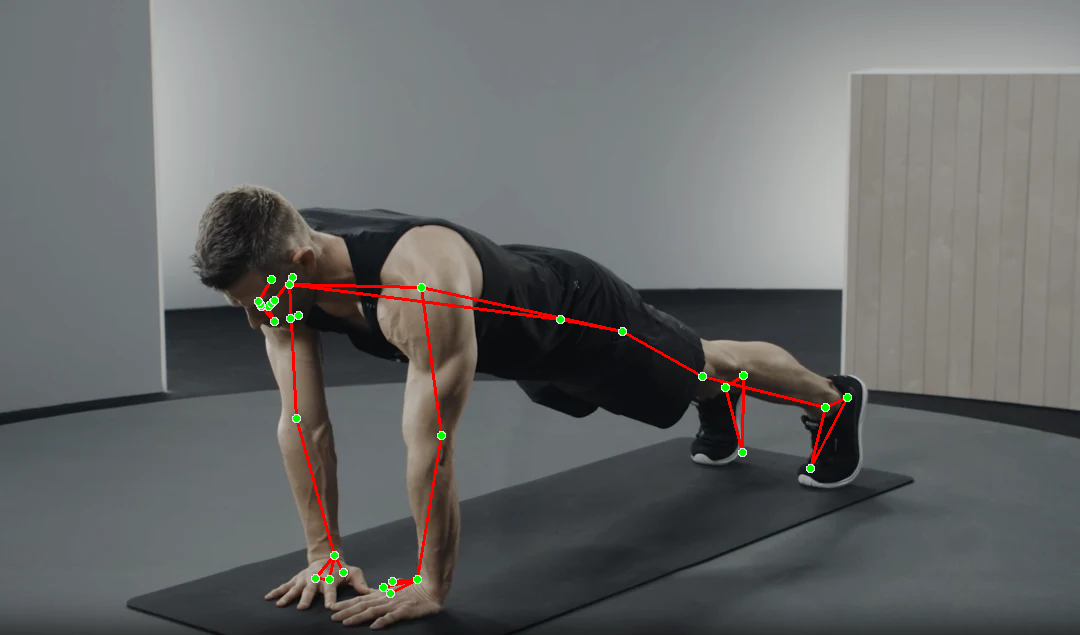

In [82]:
image = cv2.imread('/content/pushup.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pose.process(rgb_image)
print(classify_exercise(results.pose_landmarks))
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0)),
        mp_drawing.DrawingSpec(color=(0, 0, 255)))

from google.colab.patches import cv2_imshow
cv2_imshow(image)

64.72437800923903 1.0159696339724102 46.143462131818985
Squat


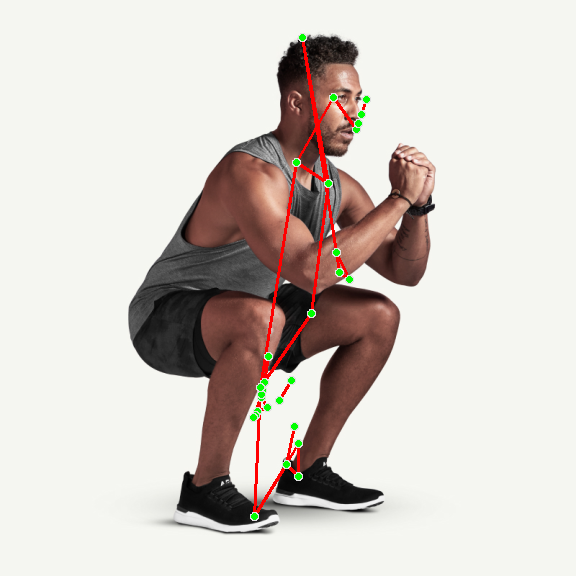

In [83]:
image = cv2.imread('/content/Bodyweight-Squat.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pose.process(rgb_image)
print(classify_exercise(results.pose_landmarks))
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0)),
        mp_drawing.DrawingSpec(color=(0, 0, 255)))

from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [69]:
if results.pose_landmarks:
    for idx, landmark in enumerate(results.pose_landmarks.landmark):
        print(f"Landmark {idx}: x={landmark.x}, y={landmark.y}, z={landmark.z}, visibility={landmark.visibility}")

Landmark 0: x=0.24859760701656342, y=0.5118680000305176, z=-0.6539434194564819, visibility=0.9998788833618164
Landmark 1: x=0.24196255207061768, y=0.48523586988449097, z=-0.6871029138565063, visibility=0.9998020529747009
Landmark 2: x=0.2447502762079239, y=0.48127105832099915, z=-0.6870794296264648, visibility=0.999822199344635
Landmark 3: x=0.24772118031978607, y=0.47672903537750244, z=-0.6871841549873352, visibility=0.9998559951782227
Landmark 4: x=0.235161691904068, y=0.4867822229862213, z=-0.6450079083442688, visibility=0.9996523857116699
Landmark 5: x=0.23312216997146606, y=0.4837607145309448, z=-0.6451441049575806, visibility=0.9996829032897949
Landmark 6: x=0.23102235794067383, y=0.4805258512496948, z=-0.6452211737632751, visibility=0.999819815158844
Landmark 7: x=0.26848042011260986, y=0.43710580468177795, z=-0.7194216251373291, visibility=0.9996762275695801
Landmark 8: x=0.24615809321403503, y=0.44495564699172974, z=-0.5303899049758911, visibility=0.9995859265327454
Landmark 9


# **MediaPipe: An Open-Source Framework for Perception Pipelines**

**MediaPipe** is an open-source framework developed by **Google** for building **multimodal applied machine learning pipelines** using **video, audio, and sensor data**. It simplifies complex perception tasks such as **hand tracking, face detection, and pose estimation** by offering a **flexible and efficient infrastructure**.

---

## **🔹 Key Components of MediaPipe**

### **1️⃣ Graphs**
- MediaPipe operates using a **graph-based architecture**.
- A **graph** consists of **nodes (calculators)** connected by **data streams**.
- Each node performs a specific function, such as **image processing**, **feature extraction**, or **machine learning inference**.

### **2️⃣ Calculators**
- The **fundamental computation units** in MediaPipe.
- Each calculator performs **specific operations**, such as:
  - Image processing  
  - Running a machine learning model  
  - Mathematical computations  
- Can be implemented in **C++ or Python**.

### **3️⃣ Packets**
- Data in MediaPipe flows in the form of **packets**.
- A **packet** is a **timestamped piece of data** (e.g., an image frame, keypoints, or matrices).
- **Timestamps allow synchronization** of different data streams.

### **4️⃣ Streams**
- **Streams** carry **packets** between calculators.
- They enable **efficient data flow** within the graph.

### **5️⃣ Subgraphs**
- **Reusable components** within a MediaPipe graph.
- Encapsulate a set of calculators and streams for **modular pipeline design**.

---

## **⚙️ How MediaPipe Works**

### **1️⃣ Graph Construction**
- Define a **graph** that includes **calculators, connections, and data streams**.
- This can be done via:
  - A configuration file (e.g., `.pbtxt` file).
  - Programmatic definition in Python or C++.

### **2️⃣ Graph Initialization**
- The framework **initializes the graph**, setting up:
  - Calculators  
  - Allocating resources  
  - Preparing data streams  

### **3️⃣ Packet Processing**
- MediaPipe processes **data in packets**, where:
  - Each packet is **timestamped**.
  - This ensures **synchronization** across different streams.

### **4️⃣ Calculator Execution**
- As packets flow through the graph, **each calculator processes them**.
- Example (Face Detection Pipeline):
  - **Calculator 1:** Preprocesses the image  
  - **Calculator 2:** Runs a face detection model  
  - **Calculator 3:** Draws bounding boxes around detected faces  

### **5️⃣ Output**
- The final output is a **set of packets containing the results**.
- Example: A pose estimation pipeline outputs **keypoints representing body joints**.

---

## **📌 Example: Hand Tracking with MediaPipe**

### **1️⃣ Define Graph**
- Includes calculators for:
  - **Image Preprocessing**
  - **Hand Detection**
  - **Hand Landmark Estimation**

### **2️⃣ Initialize Graph**
- Sets up the **necessary calculators and streams**.

### **3️⃣ Packet Processing**
- **Video frames (packets)** are fed into the graph.
- Frames are processed through:
  - **Preprocessing Calculator**  
  - **Hand Detection Calculator**  
  - **Landmark Estimation Calculator**

### **4️⃣ Output**
- The system **outputs hand landmarks** (coordinates of hand keypoints for each frame).

---

## **🚀 Advantages of MediaPipe**
✔ **Modularity** – Graph-based design enables easy **modification & extension**.  
✔ **Efficiency** – Optimized for **real-time performance** in applications like **AR/VR & gaming**.  
✔ **Cross-Platform** – Supports **Android, iOS, Desktop, and Web**.  
✔ **Prebuilt Solutions** – Ready-to-use models for **face detection, pose estimation, and hand tracking**.

---

## **🎯 Conclusion**
MediaPipe is a **powerful tool** for developing **real-time perception pipelines**. With its **graph-based architecture**, **modular components**, and **efficient processing**, it is widely used in **computer vision, AR/VR, fitness applications, and AI-driven solutions**.


